<a href="https://colab.research.google.com/github/duimagambetova/Clustering-of-scraped-data/blob/main/ClusteringKazakhData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web-scrapped data from the kazakh website.**

Here, I retrieved the questions and answers from [Surak Baribar](https://surak.baribar.kz/) into json files with the following structure:

*   Question: title, content, date, tag, views, upvotes
*   Answers: text, date, upvotes

Now,  I will conduct data analysis and cluster the data, sort it by recency.

Also, questions with answers are treated as train data and with no answers as test data. It can be used for further NLP processing, and prediction of answers on kazakh language. (?)


**Working with training data.**

In [2]:
# Step 1: Importing libraries
import pandas as pd
import json
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
files = [file for file in glob('/content/*.json')]
all_data = []

In [4]:
# Concatenate all data from the files into one
for file in files:
  with open(file, 'r', encoding = 'utf-8') as f:
    data = json.load(f)
    for entry in data:
      question = {
          'question_title': entry['question_title'],
          'question_content': entry['question_content'],
          'question_date': entry['question_date'],
          'question_tag': entry['question_tag'],
          'question_views': entry['question_views'],
          'question_upvotes': entry['question_upvotes']
      }
      if 'answers' in entry:
        for answer in entry['answers']:
            question_with_answer = question.copy()
            question_with_answer['answer_text'] = answer.get('text', np.nan)
            question_with_answer['answer_date'] = answer.get('date', np.nan)
            question_with_answer['answer_upvotes'] = answer.get('upvotes', np.nan)
            all_data.append(question_with_answer)
      else:
        question['answer_text'] = np.nan
        question['answer_date'] = np.nan
        question['answer_upvotes'] = np.nan
        all_data.append(question)



In [5]:
# Transform it into Data Frame for convenient analysis and usage
train_df = pd.DataFrame(all_data)
train_df.head()

,question_title,question_content,question_date,question_tag,question_views,question_upvotes,answer_text,answer_date,answer_upvotes
0,Жақсы емхананы қалай таңдау керек?,Тіркеуге тұрарда қандай емхананы таңдаған дұрыс?,17.10.2018,Жалпы медицина,514,0,Бұл сұраққа жауап беру өте қиын. Біздің елде м...,12.11.2018,0
1,Шие тобына күзгі балға таныстыру қажет?,Шие тобына күзгі балға қыз бен балаға таныстыр...,16.10.2018,Мектеп,2600,0,Таныстыру.\n\nКұтты болсын күзгі бал салтанаты...,8.11.2018,0
2,"""Минералдардың адам өміріндегі маңызы"" эссе ма...",Минералдардың адам өміріндегі маңызы эссе,16.10.2018,Жалпы сұрақ,19000,0,Маган минералдар адам өміріндегі маңызы эссе к...,17.10.2019,0
3,"""Минералдардың адам өміріндегі маңызы"" эссе ма...",Минералдардың адам өміріндегі маңызы эссе,16.10.2018,Жалпы сұрақ,19000,0,Минералдын манызы зор адам 70 Пизы Судан турад...,7.10.2021,0
4,"""Минералдардың адам өміріндегі маңызы"" эссе ма...",Минералдардың адам өміріндегі маңызы эссе,16.10.2018,Жалпы сұрақ,19000,0,Ответ:Адам денесінде болатын химиялық элементт...,10.10.2021,0


# **Data cleaning and preprocessing.**

In [6]:
#df.drop_duplicates(inplace=True)
train_df.describe()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18039 entries, 0 to 18038
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   question_title    18039 non-null  object
 1   question_content  18039 non-null  object
 2   question_date     18039 non-null  object
 3   question_tag      18039 non-null  object
 4   question_views    18039 non-null  int64 
 5   question_upvotes  18039 non-null  int64 
 6   answer_text       18039 non-null  object
 7   answer_date       18039 non-null  object
 8   answer_upvotes    18039 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


In [7]:
# To ensure the quality of the data, drop the question with negative upvotes
train_df = train_df[train_df['answer_upvotes'] >= 0]

In [8]:
# Convert dates to datetime format
train_df['question_date'] = pd.to_datetime(train_df['question_date'], errors='coerce', dayfirst=True)
train_df['answer_date'] = pd.to_datetime(train_df['answer_date'], errors='coerce', dayfirst=True)

In [9]:
num_questions = len(train_df['question_title'].unique())
print(f"Total number of unique questions: {num_questions}")
num_answers = len(train_df['answer_text'].unique())
print(f"Total number of unique answers: {num_answers}")

Total number of unique questions: 12941
Total number of unique answers: 17753


In [10]:
# Save the dataset
train_df.to_csv('kazakh_questions_answers.csv', index=False)

# **Data Analysis and Visualisation**


In [11]:
# Analyze the most frequent and non-frequent tags of questions..
content_type_counts = train_df['question_tag'].value_counts()
content_type_counts

question_tag
Мектеп                               1881
Университет, колледж                 1495
Жалпы сұрақ                          1156
Қазақ тілі                           1050
Химия                                 843
                                     ... 
Бокс                                    3
Фотосұрақ                               1
Компьютер, Интернет                     1
Спортшылар                              1
Маңызды мәселенің қарапайым баяны       1
Name: count, Length: 100, dtype: int64

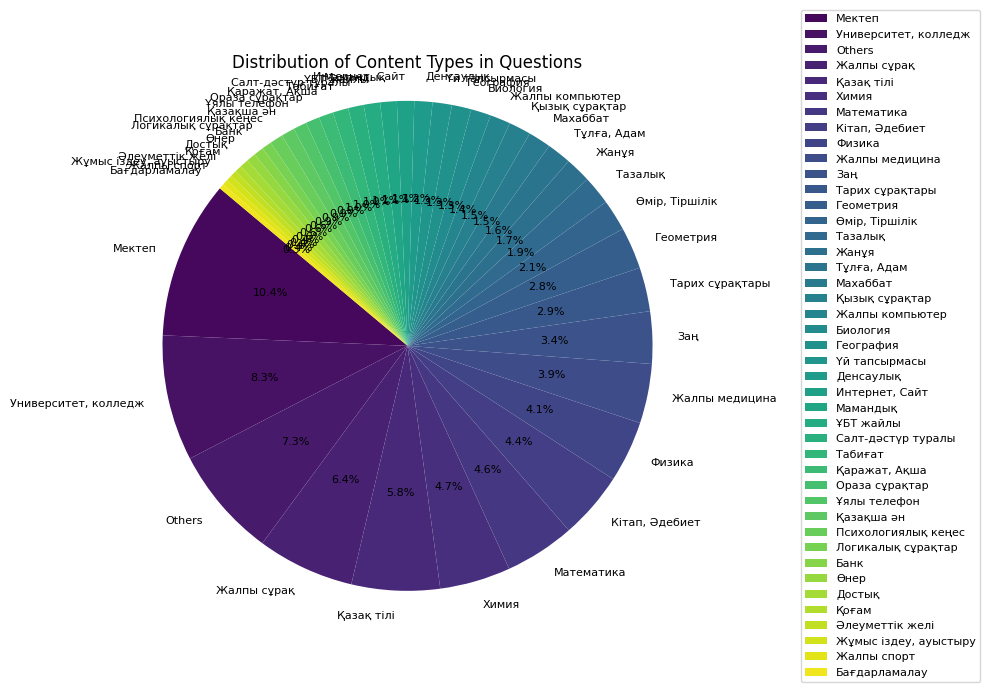

In [12]:
threshold = 60  # Categories with fewer occurrences than this will be grouped into 'Others'
small_categories = content_type_counts[content_type_counts < threshold].index
train_df['question_tag'] = train_df['question_tag'].apply(lambda x: 'Others' if x in small_categories else x)

# Recount the occurrences after grouping smaller categories
content_type_counts = train_df['question_tag'].value_counts()

# Display the counts
content_type_counts

# Pie Chart of Content Types
plt.figure(figsize=(10, 7))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(content_type_counts)), textprops={'fontsize': 8})
plt.title('Distribution of Content Types in Questions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(content_type_counts.index, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [14]:
df_clustering = train_df.copy()
label_encoder = LabelEncoder()
df_clustering['question_tag_encoded'] = label_encoder.fit_transform(df_clustering['question_tag'])
df_clustering.head()

,question_title,question_content,question_date,question_tag,question_views,question_upvotes,answer_text,answer_date,answer_upvotes,question_tag_encoded
0,Жақсы емхананы қалай таңдау керек?,Тіркеуге тұрарда қандай емхананы таңдаған дұрыс?,2018-10-17,Жалпы медицина,514,0,Бұл сұраққа жауап беру өте қиын. Біздің елде м...,2018-11-12,0,9
1,Шие тобына күзгі балға таныстыру қажет?,Шие тобына күзгі балға қыз бен балаға таныстыр...,2018-10-16,Мектеп,2600,0,Таныстыру.\n\nКұтты болсын күзгі бал салтанаты...,2018-11-08,0,21
2,"""Минералдардың адам өміріндегі маңызы"" эссе ма...",Минералдардың адам өміріндегі маңызы эссе,2018-10-16,Жалпы сұрақ,19000,0,Маган минералдар адам өміріндегі маңызы эссе к...,2019-10-17,0,11
3,"""Минералдардың адам өміріндегі маңызы"" эссе ма...",Минералдардың адам өміріндегі маңызы эссе,2018-10-16,Жалпы сұрақ,19000,0,Минералдын манызы зор адам 70 Пизы Судан турад...,2021-10-07,0,11
4,"""Минералдардың адам өміріндегі маңызы"" эссе ма...",Минералдардың адам өміріндегі маңызы эссе,2018-10-16,Жалпы сұрақ,19000,0,Ответ:Адам денесінде болатын химиялық элементт...,2021-10-10,0,11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


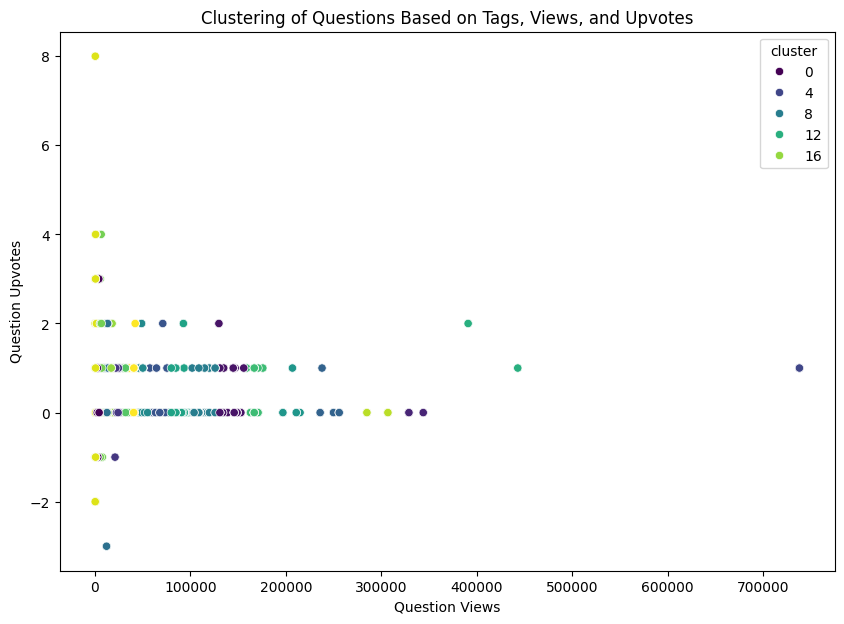

In [15]:
features = df_clustering[['question_tag_encoded', 'question_views', 'question_upvotes']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=20, random_state=0)  # Adjust the number of clusters (k) as needed
df_clustering['cluster'] = kmeans.fit_predict(features)

# Visualize clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='question_views', y='question_upvotes', hue='cluster', data=df_clustering, palette='viridis')
plt.title('Clustering of Questions Based on Tags, Views, and Upvotes')
plt.xlabel('Question Views')
plt.ylabel('Question Upvotes')
plt.show()

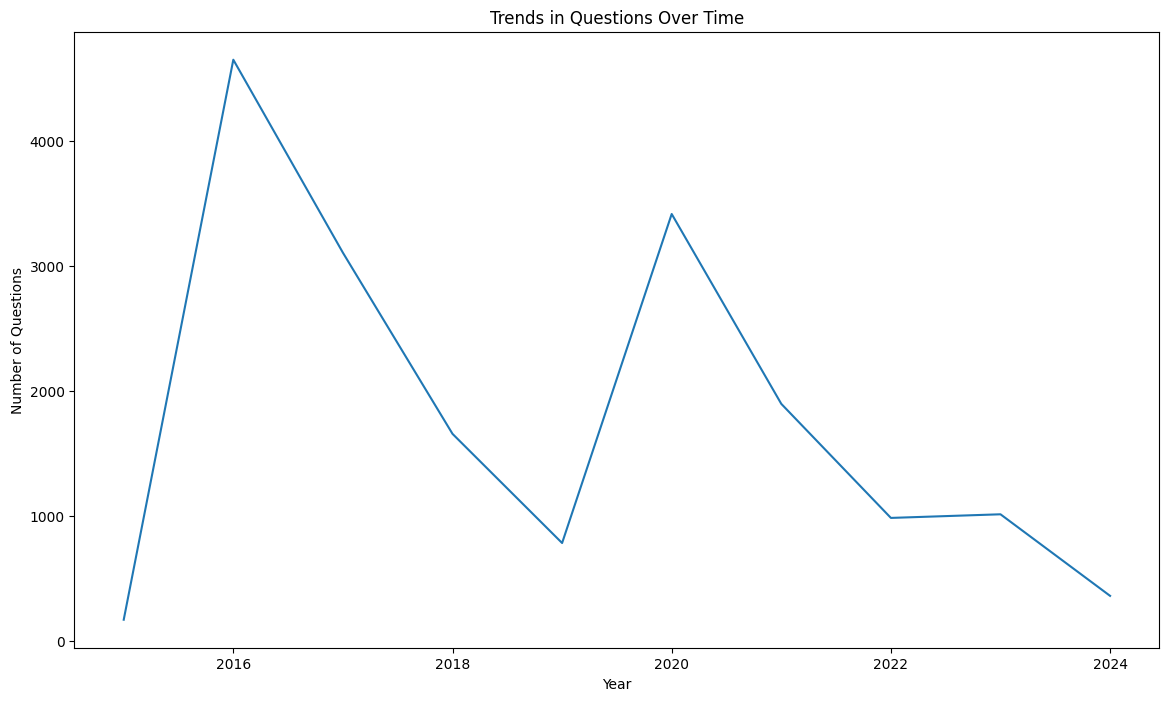

In [16]:
df_sorted = train_df.sort_values(by='question_date')

# Analyze trends over time
plt.figure(figsize=(14, 8))
df_sorted['year'] = df_sorted['question_date'].dt.year
question_count_by_year = df_sorted.groupby('year').size()
sns.lineplot(x=question_count_by_year.index, y=question_count_by_year.values)
plt.title('Trends in Questions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.show()

# **Creating test data set and applying NLP-techniques.**

In [17]:
# Get question with no answers as test df
no_answer_data = []
for file_name in files:
    with open(file_name, 'r', encoding='utf-8') as f:
        data = json.load(f)
        for entry in data:
            if 'answers' in entry and len(entry['answers']) == 0:
                question = {
                    'question_title': entry['question_title'],
                    'question_content': entry['question_content'],
                    'question_date': entry['question_date'],
                    'question_tag': entry['question_tag'],
                    'question_views': entry['question_views'],
                    'question_upvotes': entry['question_upvotes']
                }
                no_answer_data.append(question)

In [18]:
test_df = pd.DataFrame(no_answer_data)
test_df

,question_title,question_content,question_date,question_tag,question_views,question_upvotes
0,Ертеңіне тайыма ішім қазандай қайнады. Осыған ...,Ертеңіне тайыма ішім қазандай қайнады. Осыған ...,14.10.2018,Үй тапсырмасы,804,0
1,Геометрия пәнінен үшбұрыштың ауданын табу керек?,"1. Даны вершины треугольника ABC\nA(4,8,3) B(2...",14.10.2018,Геометрия,605,0
2,Афферентті көру жолдарының ауысуы болады?,Афферентті көру жолдарының ауысуы қай жерде ор...,13.10.2018,"Университет, колледж",467,0
3,"""Оразалы байға"" және"" Байларға"" өлеңіндегі бай...","Срочно нужно,пожалуйста\n\nҚашаған Күржіманұлының",10.10.2018,Үй тапсырмасы,931,0
4,Еркек мүшесі ауруы?,Мен еркекпин мушем еки бетпен жатса иа болмаса...,18.04.2020,Жалпы медицина,425,0
...,...,...,...,...,...,...
3550,Қорғаныс істері жөніндегі бірыңғай басқару қал...,"Қорғаныс істері жөніндегі бірыңғай басқару, қа...",7.05.2017,Заң,321,0
3551,Стероид жайлы ақпарат керек?,Өтнем нақты айтыңыздаршы менің денемді аздап м...,7.05.2017,Тазалық,950,0
3552,Аяқ-қол ісуінен қалай құтыламын,Сәлеметсіздер ме ?Менің аяқ-қолым іси береді н...,31.12.2015,Денсаулық,2200,0
3553,"Мынандай отшашулар қанша тұрады, жобамен?",жаңа жылдарыңмен!,30.12.2015,Жалпы сұрақ,401,0


In [19]:
# Save it
test_df.to_csv('test.csv', index=False)

# **NLP-techniques for clustering**

Here, I use cosine similarity, TF-IDF normalizer for mapping similar questions from train dataset (where answer text is provided) and test dataset (answers are not provided).

In [20]:
# Trying kazNLP for cleaning normalizing, tokenizing the texts.
!git clone https://github.com/nlacslab/kaznlp.git
%cd kaznlp
!python tutorial.py


fatal: destination path 'kaznlp' already exists and is not an empty directory.
/content/kaznlp

('Қайырлы таң! Әнші балааапан ☺️☺️☺️ L O V E  🇰🇿', {'cleaned': 3, 'l2c': 2, 'c2l': 0})
('Қайырлы таң! Әнші балапан ☺️☺️☺️ LOVE 🇰🇿', {'cleaned': 3, 'l2c': 2, 'c2l': 0})
('Каыырлы тан! Аншы балааапан <emj>smilingface</emj><emj>smilingface</emj><emj>smilingface</emj> Л О В Е  <emj>Kazakhstan</emj>', {'cleaned': 3, 'l2c': 2, 'c2l': 0})
Каыырлы тан! Аншы балапан <emj>smilingface</emj><emj>smilingface</emj><emj>smilingface</emj> ЛОВЕ <emj>Kazakhstan</emj>

[['Көш', 'жүре', 'түзеледі', '.', 'Ақсақ', 'қой', 'түстен', 'кейін', 'маңырайды', '.']]
[['Көш', 'жүре', 'түзеледі', '.'], ['Ақсақ', 'қой', 'түстен', 'кейін', 'маңырайды', '.']]

Document "Еңбек етсең ерінбей, тояды қарның тіленбей." is written in kazakh.

Document "Нет, нет, нет, нет! Мы хотим сегодня! Мы хотим сейчас!" has the following language probabilities {'kazakh': 0.37063914566921563, 'russian': 0.4127970225204484, 'other': 0.21656383181

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from kaznlp.normalization.ininorm import Normalizer
from kaznlp.tokenization.tokrex import TokenizeRex

In [22]:
normalizer = Normalizer()
tokenizer = TokenizeRex()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
kazakh_stop_words = [
    "және", "да", "де", "мен", "та", "те", "бол", "бірақ", "осы",
    "барлық", "қандай", "неге", "не", "кім", "қашан", "қайда", "қанша",
    "қай", "ол", "менің", "сенің", "оның", "біздің", "сіздің", "олардың",
    "мына", "сол", "сонша", "тек", "әр", "әрі", "бірнеше", "кейбір",
    "ғана", "мұнда", "анау", "міне", "тағы"
]

In [25]:
# Feature engineering
train_df['text'] = train_df['question_title'] + " " + train_df['question_content']
test_df['text'] = test_df['question_title'] + " " + test_df['question_content']

In [26]:
def preprocess_text(text):
    # Normalize text
    norm_text, _ = normalizer.normalize(text)
    # Tokenize text
    tokens = tokenizer.tokenize(norm_text)
    # Flatten list of token lists
    tokens = [token for sublist in tokens for token in sublist]
    return ' '.join(tokens)

In [27]:
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

In [28]:
# Creating a vectorizer with kazakh stop words
tfidf_vectorizer = TfidfVectorizer(stop_words=kazakh_stop_words, max_features=1000)

In [29]:
# Transform train data
tfidf_matrix_train = tfidf_vectorizer.fit_transform(train_df['processed_text'])
# Transform test data
tfidf_matrix_test = tfidf_vectorizer.transform(test_df['processed_text'])

In [30]:
cosine_similarities = cosine_similarity(tfidf_matrix_test, tfidf_matrix_train)

In [31]:
top_n = 3  # Number of top similar questions to retrieve
results = []  # List to store similar questions

In [33]:
for i, row in enumerate(cosine_similarities):
    similar_indices = row.argsort()[-top_n:][::-1]
    for j, score in enumerate(similar_indices):
        result = {
            "original_question": test_df.iloc[i]['text'],
            "similar_question": train_df.iloc[score]['text'],
            "answer": train_df.iloc[score]['answer_text'],
            "similarity_score": row[score]
        }
        results.append(result)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

,original_question,similar_question,answer,similarity_score
0,Ертеңіне тайыма ішім қазандай қайнады. Осыған ...,"Морфологиялық талдау жаса: Тарихшылардың, ғұнд...","Тарих-түбір сөз, -шы- зат есімнен зат есім туд...",1.000000
1,Ертеңіне тайыма ішім қазандай қайнады. Осыған ...,"Морфологиялық талдау жаса: Тарихшылардың, ғұнд...",онсегизинши созине морфологиялык талдау керек,1.000000
2,Ертеңіне тайыма ішім қазандай қайнады. Осыған ...,"Әлденіп, ауладық, жегендері сөздеріне морфолог...","Әлденіп\n\nӘл-түбір, зат есім,\n\n-ден-зат есі...",1.000000
3,Геометрия пәнінен үшбұрыштың ауданын табу кере...,Үшбұрыштың ауданын табу. Үшбұрыштың екі қабырғ...,"S=0,5*6*8*Sin120°=24*Sin(90°+30°)=24*Cos30°=24...",0.652296
4,Геометрия пәнінен үшбұрыштың ауданын табу кере...,Үшбұрыштың ауданын табыңдар? Тік бұрышты үшбұр...,"Тік бұрышты үшбұрыштың бір катеті 10 , ал оның...",0.605982
...,...,...,...,...
95,Ақтау қаласындағы Меридиан атты колледже оқып ...,Осының оригинал docx форматы барма формулалар ...,"word.docx (0,2 MB)",0.530878
96,"""Транспортное строительство"" мамандығы туралы ...","Юрист мамандығын бітіріп,қай жерге жұмысқа кір...","Қазіргі заман білімділер заманы, егер білімді ...",0.529557
97,"""Транспортное строительство"" мамандығы туралы ...",Вет - сайтар мамандығы бойынша қандай жұмысқа ...,Сени ешким ешкашан жұмисқа алмаид))) щщс! вет ...,0.503831
98,"""Транспортное строительство"" мамандығы туралы ...",Қаржы менеджмент туралы не білесіздер? Қаржы м...,"Менеджмент (ағылшынша мanage – басқару, меңгер...",0.494721


In [37]:
results_df.head(10)

,original_question,similar_question,answer,similarity_score
0,Ертеңіне тайыма ішім қазандай қайнады. Осыған ...,"Морфологиялық талдау жаса: Тарихшылардың, ғұнд...","Тарих-түбір сөз, -шы- зат есімнен зат есім туд...",1.000000
1,Ертеңіне тайыма ішім қазандай қайнады. Осыған ...,"Морфологиялық талдау жаса: Тарихшылардың, ғұнд...",онсегизинши созине морфологиялык талдау керек,1.000000
2,Ертеңіне тайыма ішім қазандай қайнады. Осыған ...,"Әлденіп, ауладық, жегендері сөздеріне морфолог...","Әлденіп\n\nӘл-түбір, зат есім,\n\n-ден-зат есі...",1.000000
3,Геометрия пәнінен үшбұрыштың ауданын табу кере...,Үшбұрыштың ауданын табу. Үшбұрыштың екі қабырғ...,"S=0,5*6*8*Sin120°=24*Sin(90°+30°)=24*Cos30°=24...",0.652296
4,Геометрия пәнінен үшбұрыштың ауданын табу кере...,Үшбұрыштың ауданын табыңдар? Тік бұрышты үшбұр...,"Тік бұрышты үшбұрыштың бір катеті 10 , ал оның...",0.605982
5,Геометрия пәнінен үшбұрыштың ауданын табу кере...,x-3y+6=0 түзуі және координата остерінен құрыл...,Түзу және координат осьтері арқылы құрылған үш...,0.564926
6,Афферентті көру жолдарының ауысуы болады? Аффе...,Дене шынықтыру пәніне оқитын студентке мінезде...,МІНЕЗДЕМЕ (студентке мінездеме)\n (студентті...,0.596183
7,Афферентті көру жолдарының ауысуы болады? Аффе...,Әртүрлі профилдегі сауықтыру лагерлерінде дене...,Әр түрлі профильдегі сауықтыру лагерлеріндегі ...,0.596183
8,Афферентті көру жолдарының ауысуы болады? Аффе...,Дене шынықтыру мұғаліміне мінездеме керек Дене...,Дене шынықтыру пәнінің мұғалімі (аты-жөні)\nМі...,0.582482
9,"""Оразалы байға"" және"" Байларға"" өлеңіндегі бай...",Қазіргі ақындар айтысындағы көтерілген мәселе ...,Қазақ әдебиеті тарихының өзекті арнасы — дәстү...,0.921306


In [39]:
results_df.to_csv('clustering_results.csv', index=False)

In [34]:
# Trying BERT tokenizer here I could not perform it in colab due to RAM restrictions
#!pip install transformers torch

In [35]:
from transformers import BertModel, BertTokenizer
import torch

In [36]:
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
#model = BertModel.from_pretrained('bert-base-multilingual-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [37]:
#def get_bert_embeddings(text_list):
    #inputs = tokenizer(text_list, return_tensors='pt', padding=True, truncation=True, max_length=512)
    #with torch.no_grad():
        #outputs = model(**inputs)
    #embeddings = outputs.last_hidden_state.mean(dim=1)
    #return embeddings

In [ ]:
# Generate BERT embeddings
#train_embeddings = get_bert_embeddings(train_df['text'].tolist())
#test_embeddings = get_bert_embeddings(test_df['text'].tolist())

In [ ]:
#cosine_similarities = cosine_similarity(test_embeddings, train_embeddings)

In [ ]:
# Retrieve similar questions
#top_n = 3  # Number of top similar questions to retrieve
#results_bert = []

#for i, row in enumerate(cosine_similarities):
    #similar_indices = row.argsort()[-top_n:][::-1]
    #for j, score in enumerate(similar_indices):
        #result = {
            #"original_question": test_df.iloc[i]['text'],
            #"similar_question": train_df.iloc[score]['text'],
            #"answer": train_df.iloc[score]['answer_text'],
            #"similarity_score": row[score]
        #}
        #results_bert.append(result)

# Create a DataFrame from the results
#results_bert_df = pd.DataFrame(results_bert)

# Display the DataFrame
#results_bert_df.head(10)